In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import time
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data['quality'] = data['quality'].apply(lambda x: 0 if x < 7 else 1)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [4]:
res = data.groupby('quality').size()
print(res)

quality
0    1382
1     217
dtype: int64


In [5]:
X = data.drop('quality', axis=1)
y = data['quality']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [7]:
class kNN:
    def __init__(self, k=3, metric='euclidean', kernel='uniform', window_size=None, alpha=2, beta=2, p=2, use_weights=False):
        self.k = k
        self.metric = metric
        self.kernel = kernel
        self.window_size = window_size
        self.alpha = alpha
        self.beta = beta
        self.p = p
        self.use_weights = use_weights

    # Функции расстояний
    def euclidean(self, v1, v2):
        return np.sqrt(np.sum((v1-v2)**2))

    # (l1 norm)
    def manhattan(self, v1, v2):
        return np.sum(np.abs(v1-v2))
    
    # (lp norm)
    def minkowski(self, v1, v2, p=2):
        return np.sum(np.abs(v1-v2)**p)**(1/p)

    def cosine_similarity(self, v1, v2):
        return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    # Функции ядер
    def uniform_kernel(self, u):
        if abs(u) <= 1:
            return 0.5
        else:
            return 0

    def gaussian_kernel(self, u):
        return np.exp(-0.5 * u**2) / np.sqrt(2 * np.pi)

    def general_kernel(self, u):
        return (1 - abs(u)**self.alpha)**self.beta
    
    def cosine_kernel(self, u):
        return np.cos(u * np.pi / 2)

    def linear_kernel(self, u):
        return np.maximum(0, 1 - u)

    def predict(self, X_train, y_train, X_test):
        y_pred = []
        for test_point in X_test:
            distances = []
            for train_point in X_train:
                # Вычисление расстояния в зависимости от выбранной метрики
                if self.metric == 'euclidean':
                    dist = self.euclidean(test_point, train_point)
                elif self.metric == 'manhattan':
                    dist = self.manhattan(test_point, train_point)
                elif self.metric == 'minkowski':
                    dist = self.minkowski(test_point, train_point)
                elif self.metric == 'cosine': # косинусное расстояние
                    dist = 1 - self.cosine_similarity(test_point, train_point)
                
                # Вычисление значения ядра в зависимости от выбранного ядра и окна
                if self.kernel == 'uniform': # равномерное
                    kernel_val = self.uniform_kernel(dist / self.window_size)
                elif self.kernel == 'gaussian': # Гауссовское
                    kernel_val = self.gaussian_kernel(dist / self.window_size)
                elif self.kernel == 'general': # общее
                    kernel_val = self.general_kernel(dist / self.window_size)
                elif self.kernel == 'cosine': # косинусное
                    kernel_val = self.cosine_kernel(dist / self.window_size)
                elif self.kernel == 'linear': # линейное
                    kernel_val = self.linear_kernel(dist / self.window_size)

                distances.append(kernel_val)

            sorted_indices = np.argsort(distances)[::-1]  # Сортировка в порядке убывания
            k_nearest_indices = sorted_indices[:self.k]
            k_nearest_labels = y_train[k_nearest_indices]

            if self.use_weights:
                weights = distances[:self.k]
                weighted_mode = np.average(k_nearest_labels, weights=weights)
                y_pred.append(weighted_mode)
            else:
                mode = stats.mode(k_nearest_labels)
                y_pred.append(mode.mode[0])

        return y_pred

In [8]:
# рассчет accuracy
def accuracy(preds, y_test):
    return 100 * (preds == y_test).mean()

In [40]:
for metric in ['euclidean', 'manhattan', 'minkowski', 'cosine']:
    for kernel in ['uniform', 'gaussian', 'general', 'cosine', 'linear']:
        knn = kNN(k=2, metric=metric, kernel=kernel, window_size=2.0, use_weights=False)
        knn.fit(X_train.values, y_train.values)
        preds = knn.predict(X_train.values, y_train.values, X_test.values)
        print(f'Metric: {metric}, Kernel: {kernel}, Accuracy: {accuracy(preds, y_test):.3f} %')
        
    print()

C:\Users\ProRock\AppData\Local\Temp\ipykernel_13532\3998592993.py:88: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(k_nearest_labels)


Metric: euclidean, Kernel: uniform, Accuracy: 86.250 %
Metric: euclidean, Kernel: gaussian, Accuracy: 88.438 %
Metric: euclidean, Kernel: general, Accuracy: 86.562 %
Metric: euclidean, Kernel: cosine, Accuracy: 85.312 %
Metric: euclidean, Kernel: linear, Accuracy: 88.438 %

Metric: manhattan, Kernel: uniform, Accuracy: 87.500 %
Metric: manhattan, Kernel: gaussian, Accuracy: 88.438 %
Metric: manhattan, Kernel: general, Accuracy: 86.562 %
Metric: manhattan, Kernel: cosine, Accuracy: 86.875 %
Metric: manhattan, Kernel: linear, Accuracy: 87.500 %

Metric: minkowski, Kernel: uniform, Accuracy: 86.250 %
Metric: minkowski, Kernel: gaussian, Accuracy: 88.438 %
Metric: minkowski, Kernel: general, Accuracy: 86.562 %
Metric: minkowski, Kernel: cosine, Accuracy: 85.312 %
Metric: minkowski, Kernel: linear, Accuracy: 88.438 %

Metric: cosine, Kernel: uniform, Accuracy: 86.562 %
Metric: cosine, Kernel: gaussian, Accuracy: 89.062 %
Metric: cosine, Kernel: general, Accuracy: 89.062 %
Metric: cosine, Ke

## График зависимости на тестовом множестве

C:\Users\ProRock\AppData\Local\Temp\ipykernel_13532\3998592993.py:88: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(k_nearest_labels)


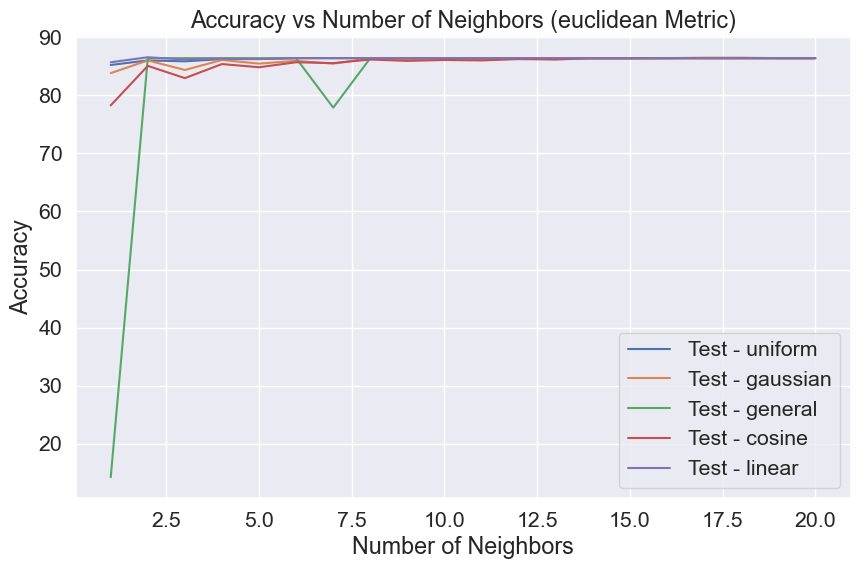

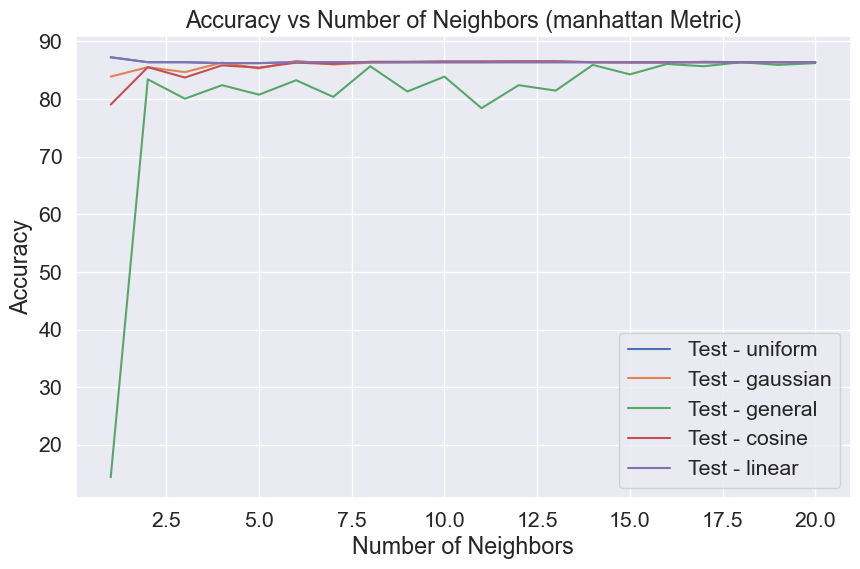

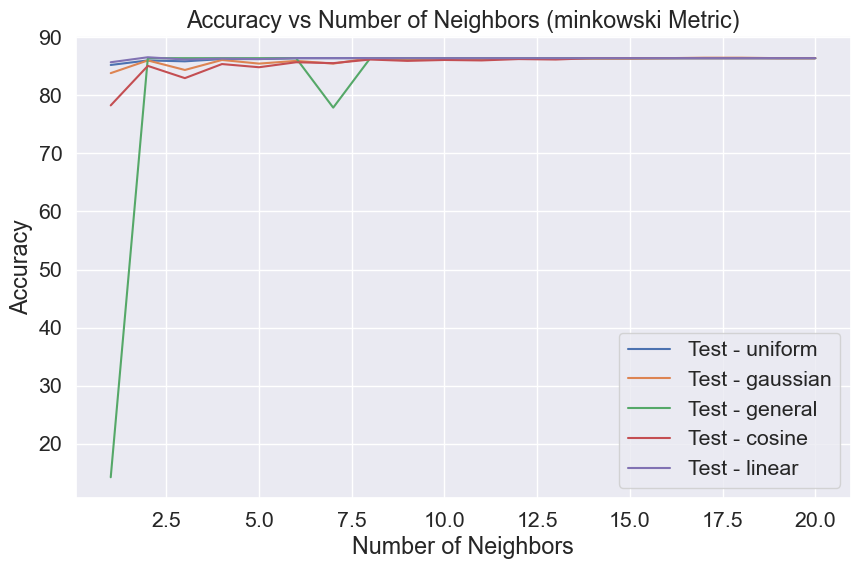

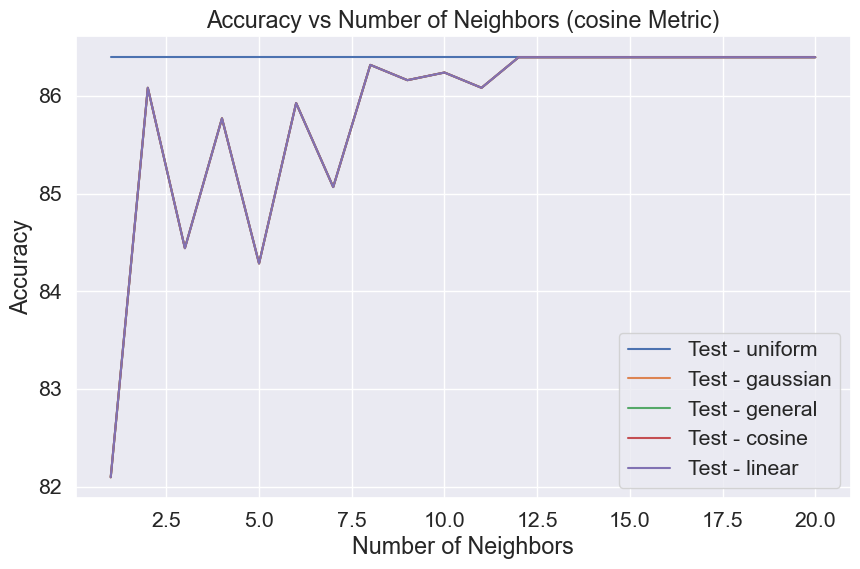

In [44]:
neighbors = range(1, 21)
metrics = ['euclidean', 'manhattan', 'minkowski', 'cosine']
kernels = ['uniform', 'gaussian', 'general', 'cosine', 'linear']
accuracy_data = {metric: {kernel: [] for kernel in kernels} for metric in metrics}

for metric in metrics:
    for kernel in kernels:
        accuracy_values = []
        for n in neighbors:
            knn = kNN(k=n, metric=metric, kernel=kernel, window_size=2.0, use_weights=False)
            knn.fit(X_train.values, y_train.values)
            preds = knn.predict(X_test.values, y_test.values, X_train.values)
            accuracy_values.append(accuracy(preds, y_train))
            
        accuracy_data[metric][kernel] = (accuracy_values)
            

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.title(f'Accuracy vs Number of Neighbors ({metric} Metric)')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    for kernel in kernels:
        plt.plot(neighbors, accuracy_data[metric][kernel], label=f'Test - {kernel}')
    plt.legend()
    plt.show()

## График зависимости на тренировочном множестве

C:\Users\ProRock\AppData\Local\Temp\ipykernel_13532\3998592993.py:88: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(k_nearest_labels)


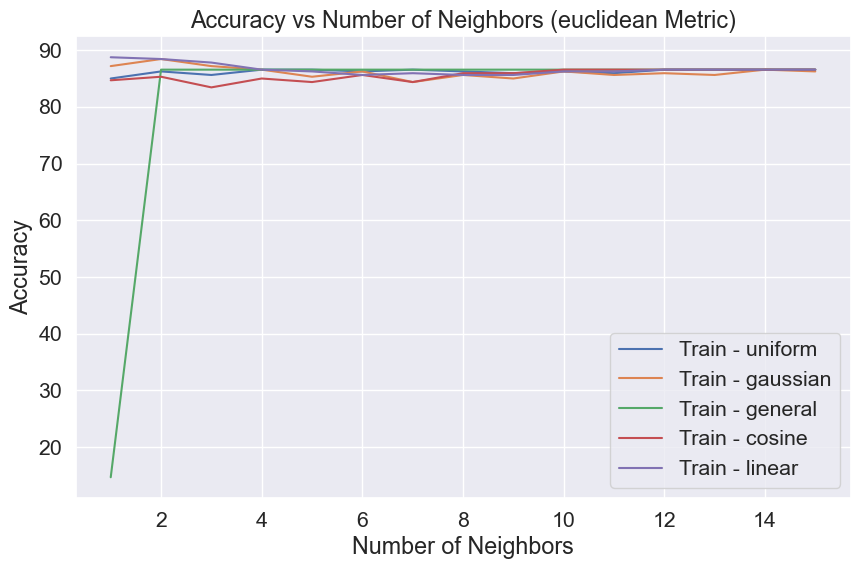

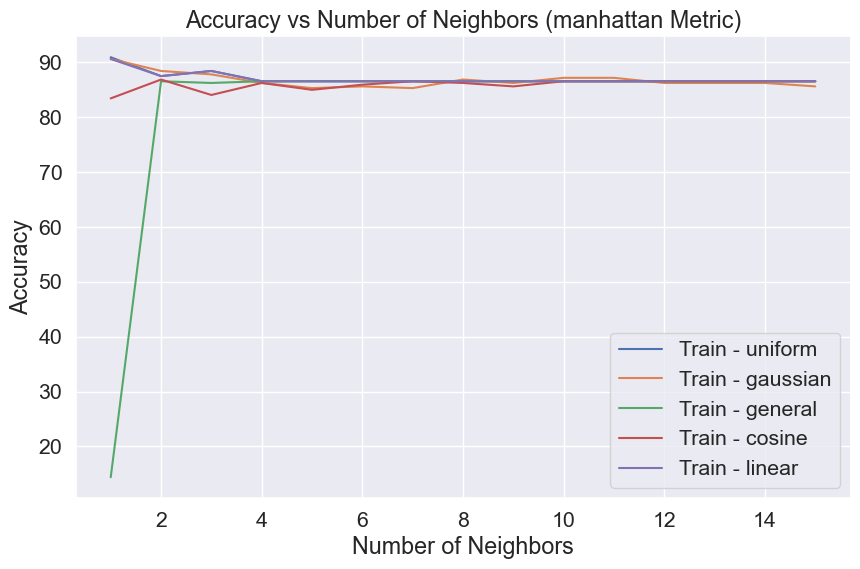

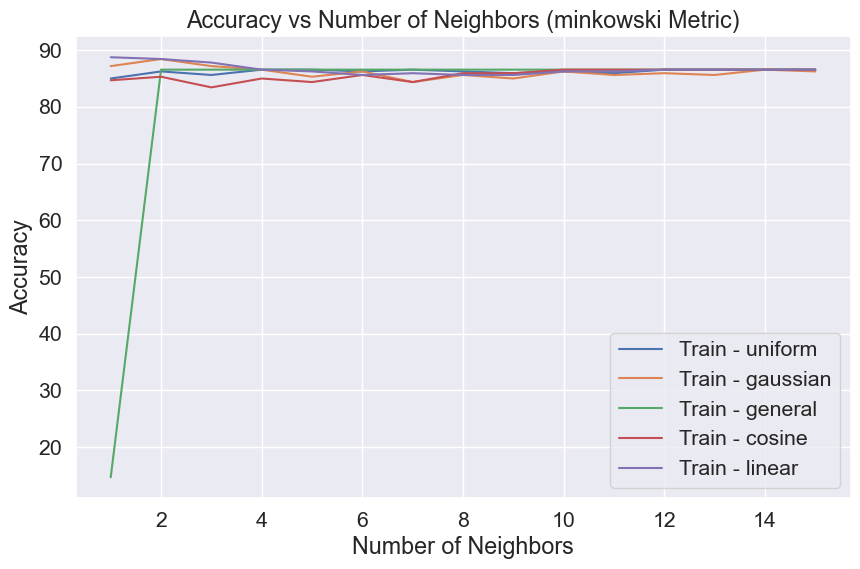

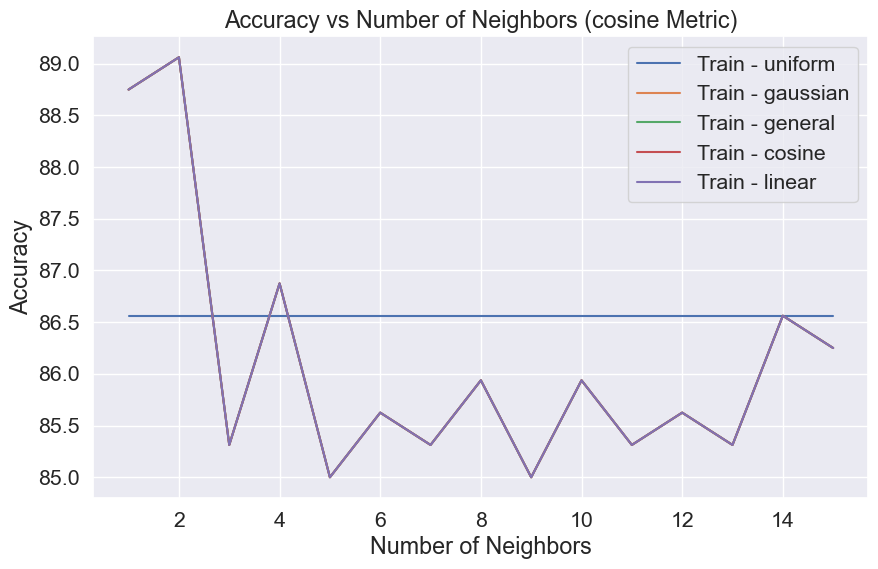

In [46]:
neighbors = range(1, 16)
metrics = ['euclidean', 'manhattan', 'minkowski', 'cosine']
kernels = ['uniform', 'gaussian', 'general', 'cosine', 'linear']
accuracy_data = {metric: {kernel: [] for kernel in kernels} for metric in metrics}

for metric in metrics:
    for kernel in kernels:
        accuracy_values = []
        for n in neighbors:
            knn = kNN(k=n, metric=metric, kernel=kernel, window_size=2.0, use_weights=False)
            knn.fit(X_train.values, y_train.values)
            preds = knn.predict(X_train.values, y_train.values, X_test.values)
            accuracy_values.append(accuracy(preds, y_test))
        
        accuracy_data[metric][kernel] = (accuracy_values)
            

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.title(f'Accuracy vs Number of Neighbors ({metric} Metric)')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    for kernel in kernels:
        plt.plot(neighbors, accuracy_data[metric][kernel], label=f'Train - {kernel}')
    plt.legend()
    plt.show()

### Библиотечное решение

In [12]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train.values, y_train.values)
preds = clf.predict(X_test.values)

def accuracy(preds, y_test):
    return 100 * (preds == y_test).mean()

print(f'Sklearn accuracy: {accuracy(preds, y_test):.3f} %')

Sklearn accuracy: 85.312 %


In [13]:
def accuracy(preds, y_test):
    return 100 * (preds == y_test).mean()

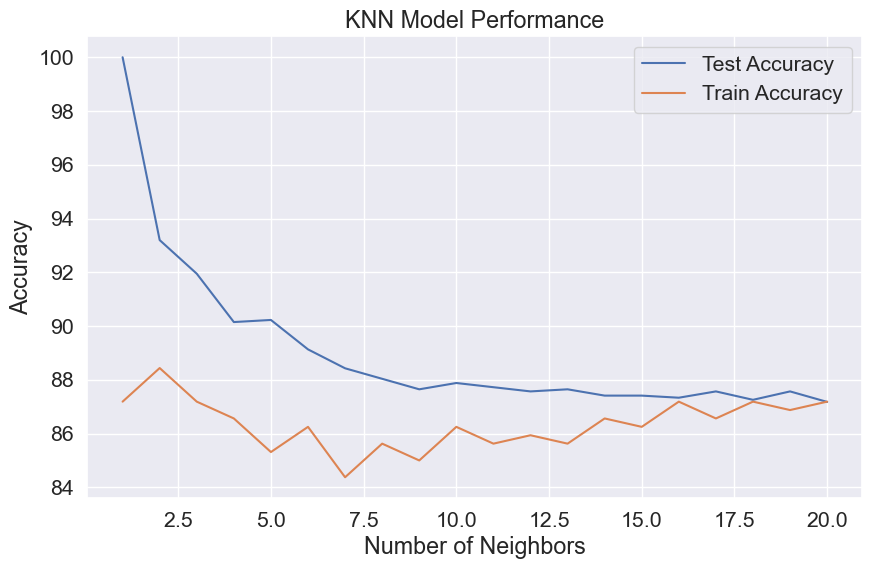

In [43]:
from sklearn.neighbors import KNeighborsClassifier

# Создание списков для сохранения значений ошибки на тренировочном и тестовом множествах
train_accuracy = []
test_accuracy = []

neighbors = range(1, 21)
for n in neighbors:  
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train.values, y_train.values)
    
    train_pred = clf.predict(X_train.values)
    train_accuracy.append(accuracy(train_pred, y_train))
    
    test_pred = clf.predict(X_test.values)
    test_accuracy.append(accuracy(test_pred, y_test))
    

# Построение графика зависимости ошибки от количества соседей
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_accuracy, label='Test Accuracy')
plt.plot(neighbors, test_accuracy, label='Train Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Model Performance')
plt.legend()
plt.show()

# Поиск аномалий

In [13]:
X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values

In [15]:
def tricube_weights(distances, bandwidth):
    return np.clip((1 - np.abs(distances) ** 3) ** 3, 0, 1)

def lowess_weighted(X, y, own_weights, frac=0.2, iter=3):
    n = X.shape[0]
    y_pred = np.zeros(n)
    bandwidth = 1.0
    residuals_own = np.zeros_like(y, dtype=np.float64)
    
    for j in range(X_np.shape[1]):  # Проходим по каждой колонке в X
        for _ in range(iter):
            for i in range(n):
                distances = np.abs(X[:, j] - X[:, j][i])
                weights = tricube_weights(distances / bandwidth, frac)
                b = np.linalg.lstsq(np.column_stack((np.ones(n), X[:, j])), y * weights)[0]
                y_pred[i] = np.dot(np.array([1, X[:, j][i]]), b)
        residuals_own += (y - y_pred.flatten()) * own_weights

    return residuals_own

In [16]:
# Преобразование данных из DataFrame и Series в массивы NumPy
X_np = X.values
y_np = y.values

X_np = X_np[:-1]
y_np = y_np[:-1]

# Разделение данных на тренировочное и тестовое множества
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.5, random_state=42)

# Веса для взвешивания объектов
weights = np.random.rand(X_train.shape[0])

# Взвешивание тренировочного множества
X_train_weighted = X_train * weights[:, np.newaxis]
y_train_weighted = y_train * weights

In [18]:
residuals_before_own = lowess_weighted(X_test, y_test, np.ones_like(y_test))
residuals_after_own = lowess_weighted(X_test, y_test, weights)

mse_before_weighting_own = mean_squared_error(y_test, residuals_before_own)
mse_after_weighting_own = mean_squared_error(y_test, residuals_after_own)

print("MSE перед взвешиванием:", mse_before_weighting_own)
print("MSE после взвешивания:", mse_after_weighting_own)

C:\Users\ProRock\AppData\Local\Temp\ipykernel_8240\2809483588.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b = np.linalg.lstsq(np.column_stack((np.ones(n), X[:, j])), y * weights)[0]


MSE перед взвешиванием: 11.62369579255868
MSE после взвешивания: 3.2504802128846193


### Библиотечное решение

In [19]:
# Функция для поиска аномалий с учетом весов
def lowess_anomaly_detection_weighted(X, y, weights, frac=0.2):
    residuals = np.zeros_like(y, dtype=np.float64)  # Указываем тип данных float64
    for i in range(X.shape[1]):  # Проходим по каждой колонке в X
        y_pred = sm.nonparametric.lowess(y, X[:, i], frac=frac, return_sorted=False)
        residuals += (y - y_pred.flatten()) * weights
    return residuals

# Вызов функции для поиска аномалий до и после взвешивания
residuals_before = lowess_anomaly_detection_weighted(X_test, y_test, np.ones_like(y_test))
residuals_after = lowess_anomaly_detection_weighted(X_test, y_test, weights)

In [20]:
mse_before_weighting = mean_squared_error(y_test, residuals_before)
mse_after_weighting = mean_squared_error(y_test, residuals_after)

print("MSE before weighting:", mse_before_weighting)
print("MSE after weighting:", mse_after_weighting)

MSE before weighting: 13.258453825725665
MSE after weighting: 3.694845562788964
